In [ ]:
# from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('BDM\India_New_Cases.csv')

In [13]:
pwd

'F:\\RemWork'

In [14]:
model = pm.auto_arima(df, start_p=1, start_q=1,
                      test='adf',       
                      max_p=3, max_q=3, 
                      m=1,             
                      d=None,          
                      seasonal=False,  
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=2076.094, BIC=2087.918, Time=0.648 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=2073.775, BIC=2079.686, Time=0.020 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=2075.688, BIC=2084.555, Time=0.021 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=2075.699, BIC=2084.566, Time=0.076 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=2083.153, BIC=2086.109, Time=0.008 seconds
Total fit time: 1.307 seconds


In [15]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1034.887
Date:                Mon, 06 Jul 2020   AIC                           2073.775
Time:                        22:04:18   BIC                           2079.686
Sample:                             0   HQIC                          2076.177
                                - 143                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    102.2183     34.626      2.952      0.003      34.352     170.085
sigma2      1.252e+05   8893.359     14.083      0.000    1.08e+05    1.43e+05
Ljung-Box (Q):                       89.07   Jarque-

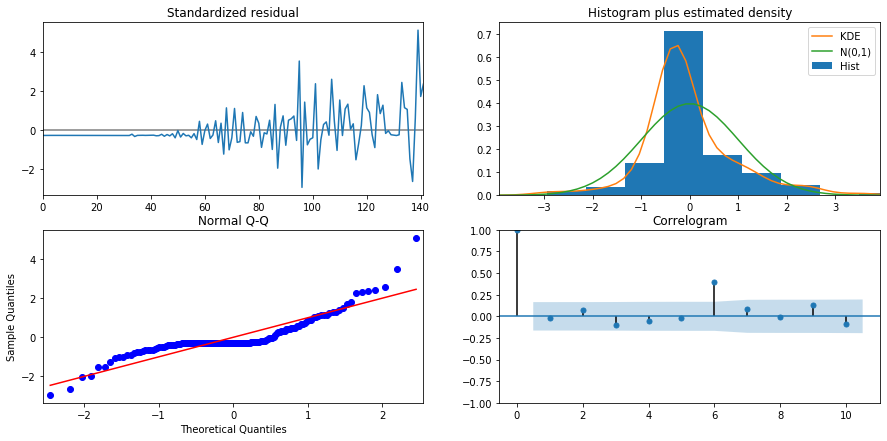

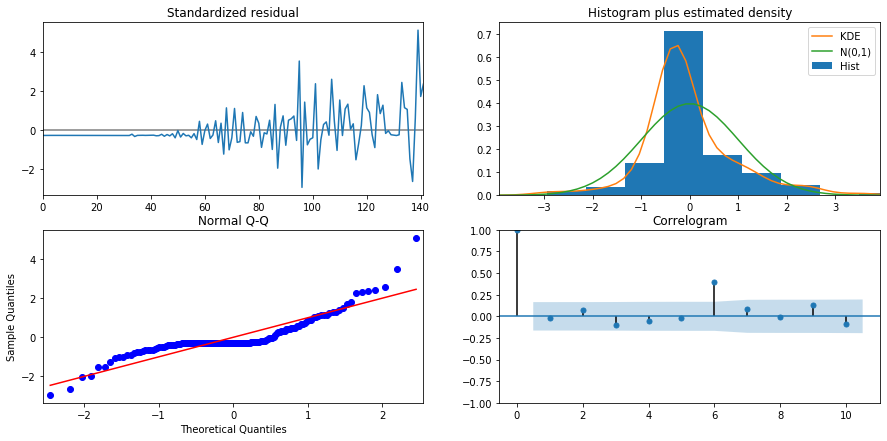

In [23]:
model.plot_diagnostics(figsize=(15,7))

In [17]:
import numpy as np

In [18]:
n_periods = 60
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df), len(df)+n_periods)

In [19]:
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

In [20]:
import matplotlib.pyplot as plt

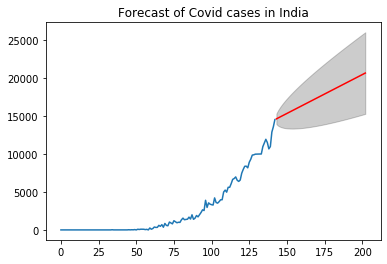

In [21]:
plt.plot(df)
plt.plot(fc_series, color='red')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.20)

plt.title("Forecast of Covid cases in India")
plt.show()

In [22]:
#prediction = pd.DataFrame(fc_series, columns=['predictions']).to_csv('forecast.csv')

In [24]:
model = ARIMA(df, order=(0,1,0))

TypeError: float() argument must be a string or a number, not 'ARIMA'

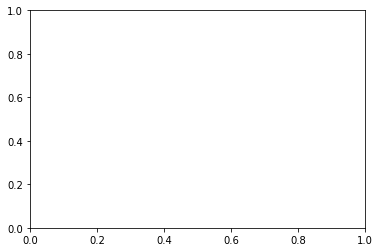